In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path

from os import getcwd
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
from scipy.stats import norm
import matplotlib.patches as mpatches


In [2]:
anova_feature_cue = loadmat("processed_data/anova_feature_cue.mat")
pv_v = anova_feature_cue['pv_v']
pv_c = anova_feature_cue['pv_c']

In [3]:
pv_v.shape

(6, 5000)

In [4]:
pv_c.shape

(9, 5000)

In [3]:
rest_time = np.mean(np.concatenate([pv_v, pv_c]), axis=0)[:1000]
mu, std = norm.fit(rest_time) 
sig_diff = mu+1.96*std


In [5]:
plt.plot(x, p, 'k', linewidth=2)
mu
std

NameError: name 'x' is not defined

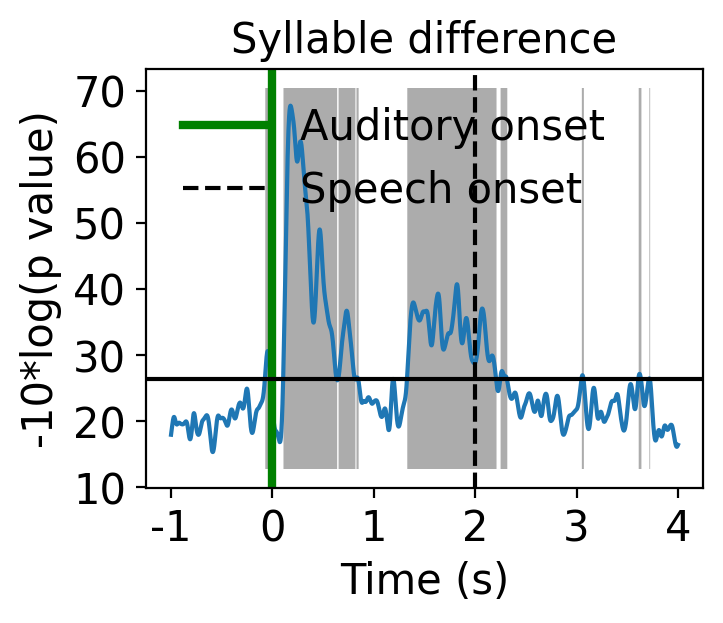

In [8]:
xvals = np.linspace(-1, 4, 5000)


fig, axs = plt.subplots(1, 1, figsize=(3.5, 3), dpi=200, constrained_layout=True)
fig.patch.set_alpha(0)

axs.patch.set_alpha(0)
axs.plot(xvals, np.mean(np.concatenate([pv_v, pv_c]), axis=0))
axs.set_xlabel('Time (s)', fontsize=15)
axs.set_ylabel('-10*log(p value)', fontsize=15)
axs.set_title('Syllable difference', fontsize=15)
axs.axvline(0, label='Auditory onset', color='green', linewidth=3)
axs.axvline(2, color='k', linestyle='--', label='Speech onset')
plt.legend(fontsize=15, frameon=0)
axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=15)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=15)

patch_y = axs.get_ylim()[1] - axs.get_ylim()[0]

for item in range(len(xvals)):
    if np.mean(np.concatenate([pv_v, pv_c]), axis=0)[item] > sig_diff:
        axs.add_patch(mpatches.Rectangle((item/1000-1, 
                                                   axs.get_ylim()[0]), 
                                                  0.01, patch_y, color='grey', 
                                                  alpha=0.1, ec=None))


axs.axhline(sig_diff, color='k')
#plt.savefig("../plots/fig2c.svg", format = 'svg', dpi=200);
plt.plot();

In [17]:
np.linspace(0, 5000, 6)

array([   0., 1000., 2000., 3000., 4000., 5000.])

In [3]:
pv_v.shape

(6, 5000)

In [5]:
y_axis_v = np.repeat('V', len(pv_v))
y_axis_c = np.repeat('C', len(pv_c))
y_axis_cv = np.concatenate((y_axis_c, y_axis_v))

NameError: name 'y_axis_cv' is not defined

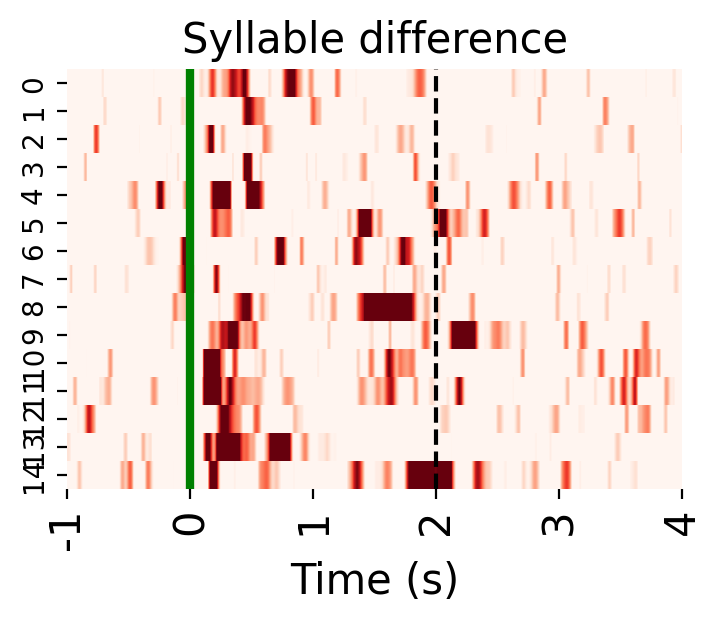

In [5]:
xvals = np.linspace(-1, 4, 5000)


fig, axs = plt.subplots(1, 1, figsize=(3.5, 3), dpi=200, constrained_layout=True)
fig.patch.set_alpha(0)

axs.patch.set_alpha(0)
sns.heatmap(np.concatenate([pv_v, pv_c]), vmin=20, vmax=70, cbar=False, cmap='Reds')
axs.set_xlabel('Time (s)', fontsize=15)
#axs.set_ylabel('-10*log(p value)', fontsize=15)
axs.set_title('Syllable difference', fontsize=15)
axs.axvline(1000, label='Auditory onset', color='green', linewidth=3)
axs.axvline(3000, color='k', linestyle='--', label='Speech onset')
#plt.legend(fontsize=15, frameon=0)
axs.set_xticks(np.linspace(0, 5000, 6))
axs.set_xticklabels(np.linspace(-1, 4, 6, dtype=int), fontsize=15, rotation=90)
axs.set_yticklabels(y_axis_cv, fontsize=15)

patch_y = axs.get_ylim()[1] - axs.get_ylim()[0]

for item in range(len(xvals)):
    if np.mean(np.concatenate([pv_v, pv_c]), axis=0)[item] > sig_diff:
        axs.add_patch(mpatches.Rectangle((item, 
                                                   0), 
                                                  1, 15, color='grey', 
                                                  alpha=0.5, ec=None))



#plt.savefig("../plots/fig2c.svg", format = 'svg', dpi=200);
plt.plot();

In [10]:
total_pv_v.shape

(15, 5000)

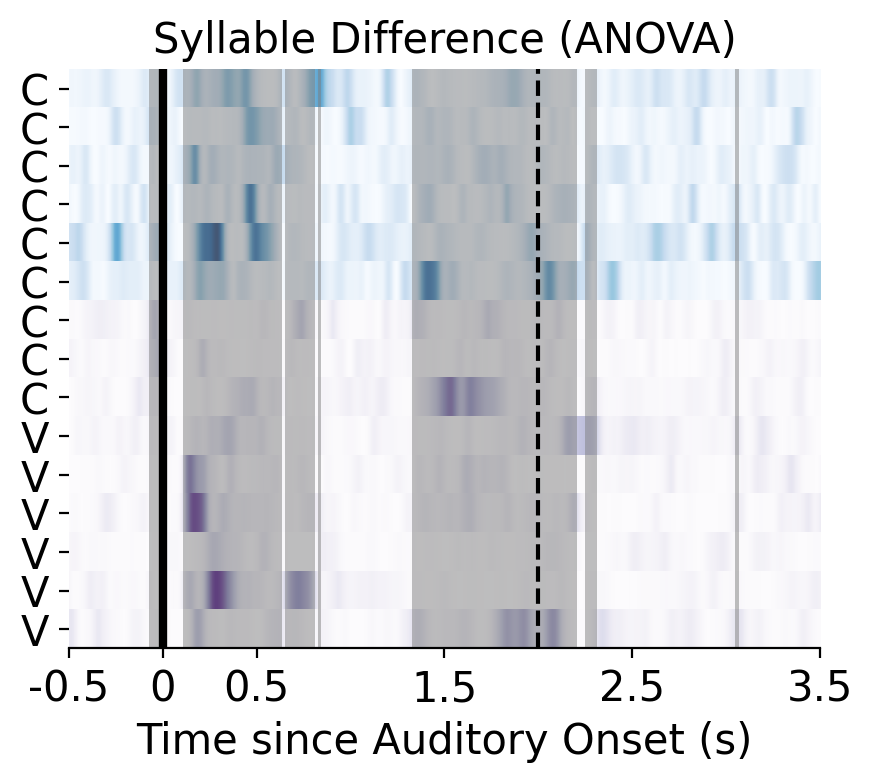

In [19]:
xvals = np.linspace(-1, 4, 5000)


fig, axs = plt.subplots(1, 1, figsize=(4.25, 3.8), dpi=200, constrained_layout=True)
fig.patch.set_alpha(0)

axs.patch.set_alpha(0)



total_pv = np.concatenate([pv_v, pv_c], axis=0)
v_mask = np.concatenate([np.ones(pv_v.shape), np.zeros(pv_c.shape)], axis=0)
c_mask = np.concatenate([np.zeros(pv_v.shape), np.ones(pv_c.shape)], axis=0)

total_pv_v = np.ma.masked_array(total_pv, v_mask)
total_pv_c = np.ma.masked_array(total_pv, c_mask)

axs.imshow(total_pv_v[:, 500:-500], cmap='Purples', aspect="auto", interpolation='none')
axs.imshow(total_pv_c[:, 500:-500], cmap='Blues', aspect="auto", interpolation='none')


axs.set_xlabel('Time since Auditory Onset (s)', fontsize=15)
#axs.set_ylabel('-10*log(p value)', fontsize=15)
axs.set_title('Syllable Difference (ANOVA)', fontsize=15)
axs.axvline(500, label='Auditory Onset', color='k', linewidth=3)
axs.axvline(2500, color='k', linestyle='--', label='Speech onset')
#plt.legend(fontsize=15, frameon=0)
axs.set_xticks([0, 500, 1000, 2000, 3000, 3999])
axs.set_xticklabels([-0.5, 0, 0.5, 1.5, 2.5, 3.5], fontsize=15, rotation=0)
axs.set_yticks(np.linspace(0, 14, 15))
axs.set_yticklabels(y_axis_cv, fontsize=15)
patch_y = axs.get_ylim()[1] - axs.get_ylim()[0]

for item in range(500, len(xvals)-500):
    if np.mean(np.concatenate([pv_v, pv_c]), axis=0)[item] > sig_diff:
        axs.add_patch(mpatches.Rectangle((item-500, 
                                                   -0.5), 
                                                  1, 15, color='grey', 
                                                  alpha=0.5, ec=None))

sns.despine(ax=axs, top=True, right=True, left=True, bottom=False)


#plt.savefig("../plots/fig2c.svg", format = 'svg', dpi=200);
plt.plot();

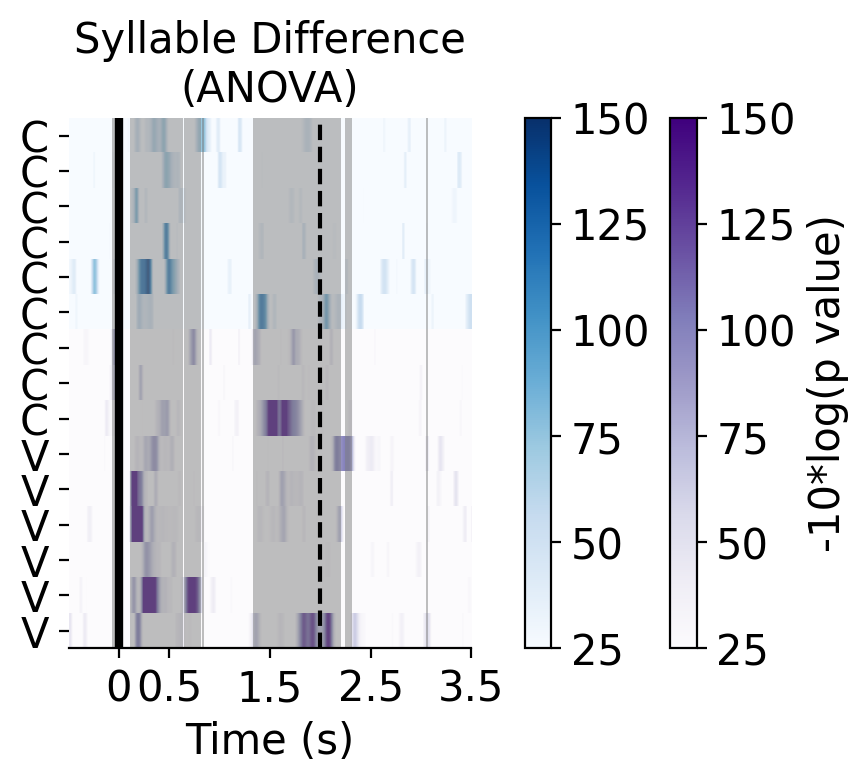

In [15]:
xvals = np.linspace(-1, 4, 5000)


fig, axs = plt.subplots(1, 1, figsize=(4.25, 3.8), dpi=200, constrained_layout=True)
fig.patch.set_alpha(0)

axs.patch.set_alpha(0)



total_pv = np.concatenate([pv_v, pv_c], axis=0)
v_mask = np.concatenate([np.ones(pv_v.shape), np.zeros(pv_c.shape)], axis=0)
c_mask = np.concatenate([np.zeros(pv_v.shape), np.ones(pv_c.shape)], axis=0)

total_pv_v = np.ma.masked_array(total_pv, v_mask)
total_pv_c = np.ma.masked_array(total_pv, c_mask)

img1 = axs.imshow(total_pv_v[:, 500:-500], cmap='Purples', aspect="auto", 
                  interpolation='none', vmin=25, vmax=150)
img2 = axs.imshow(total_pv_c[:, 500:-500], cmap='Blues', aspect="auto", 
                  interpolation='none', vmin=25, vmax=150)


axs.set_xlabel('Time (s)', fontsize=15)
#axs.set_ylabel('-10*log(p value)', fontsize=15)
axs.set_title('Syllable Difference\n(ANOVA)', fontsize=15)
axs.axvline(500, label='Auditory Onset', color='k', linewidth=3)
axs.axvline(2500, color='k', linestyle='--', label='Speech onset')
#plt.legend(fontsize=15, frameon=0)
axs.set_xticks([500, 1000, 2000, 3000, 3999])
axs.set_xticklabels([0, 0.5, 1.5, 2.5, 3.5], fontsize=15, rotation=0)
axs.set_yticks(np.linspace(0, 14, 15))
axs.set_yticklabels(y_axis_cv, fontsize=15)
patch_y = axs.get_ylim()[1] - axs.get_ylim()[0]

for item in range(500, len(xvals)-500):
    if np.mean(np.concatenate([pv_v, pv_c]), axis=0)[item] > sig_diff:
        axs.add_patch(mpatches.Rectangle((item-500, 
                                                   -0.5), 
                                                  1, 15, color='grey', 
                                                  alpha=0.5, ec=None))

sns.despine(ax=axs, top=True, right=True, left=True, bottom=False)
cbar1 = plt.colorbar(img1)
cbar2 = plt.colorbar(img2)
cbar1.ax.tick_params(labelsize=15)
cbar2.ax.tick_params(labelsize=15)
cbar1.set_label('-10*log(p value)', fontsize=15)


#plt.savefig("../plots/fig2c.svg", format = 'svg', dpi=200);
plt.plot();

<Axes: >

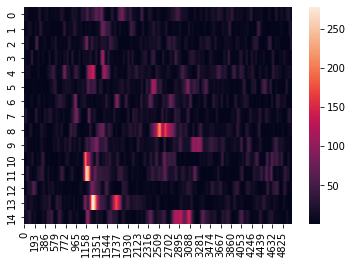

In [15]:
sns.heatmap(np.concatenate([pv_v, pv_c]))
axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=15)


<Axes: >

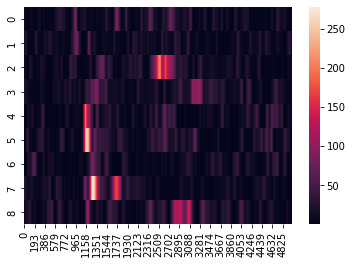

In [12]:
sns.heatmap(pv_c)